In [233]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LinearRegression 

In [92]:
pd.set_option('display.max_rows', 500)
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

In [2]:
case_labs = pd.read_csv('case_55h_hourly_labs_ex1c_collected.csv')
control_labs = pd.read_csv('control_55h_hourly_labs_ex1c_collected.csv')

In [3]:
case_vitals = pd.read_csv('case_55h_hourly_vitals_ex1c_collected.csv')
control_vitals = pd.read_csv('control_55h_hourly_vitals_ex1c_collected.csv')

In [4]:
statics = pd.read_csv('static_variables.csv')

In [181]:
full_labvitals = pd.read_csv('full_labvitals_horizon_0.csv')

In [182]:
full_labvitals

,label,icustay_id,subject_id,chart_time,sepsis_target,sysbp,diabp,meanbp,resprate,heartrate,...,po2_bloodgas,ph_bloodgas,pco2_bloodgas,so2_bloodgas,troponin_t,glucose_csf,total_protein_joint_fluid,total_protein_pleural,urine_albumin_creatinine_ratio,wbc_ascites
0,1,200087,61871,0.103056,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,200087,61871,0.153056,0,NaN,NaN,NaN,27.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,200087,61871,0.369722,0,129.0,74.0,81.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,200087,61871,0.536389,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,200087,61871,0.669722,0,116.0,76.0,84.0,26.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322402,0,299962,73807,1.081667,0,NaN,NaN,NaN,16.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322403,0,299962,73807,1.931667,0,103.0,72.0,79.0,15.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322404,0,299962,73807,2.931667,0,96.0,61.0,69.0,15.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322405,0,299962,73807,3.015000,0,NaN,NaN,NaN,17.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
dup_full_labvitals = full_labvitals[['icustay_id', 'subject_id']].drop_duplicates().reset_index()

In [121]:
new_full_labvitals = pd.DataFrame(columns=full_labvitals.columns)

In [135]:
dup_full_labvitals

,index,icustay_id,subject_id
0,0,200087,61871
1,41,200116,61654
2,62,200286,69272
3,111,200290,76420
4,132,200349,96518
...,...,...,...
19065,322322,299933,52441
19066,322334,299947,93831
19067,322364,299949,53283
19068,322395,299957,50334


In [123]:
for i, d in tqdm(dup_full_labvitals.iterrows(), total=dup_full_labvitals.shape[0]):
    icustay_id = d['icustay_id']    
    subject_id = d['subject_id']
    
    f_d = full_labvitals[(full_labvitals['icustay_id'] == icustay_id) & (full_labvitals['subject_id'] == subject_id)]
    
    if len(f_d[f_d['sepsis_target'] == 1]) >= 1:
        f_d = f_d[f_d['sepsis_target'] == 1]
    
    f_d['notnull_count'] = f_d.notnull().sum(1)
    f_d = f_d[f_d['notnull_count'].max() == f_d['notnull_count']]
    new_full_labvitals = pd.concat([f_d.drop(columns=['notnull_count']), new_full_labvitals]).reset_index(drop=True)


 11%|████████▎                                                                   | 2071/19070 [00:06<01:19, 213.21it/s]


 17%|████████████▉                                                               | 3243/19070 [00:14<01:36, 163.60it/s]


 22%|█████████████████                                                           | 4278/19070 [00:21<01:47, 137.90it/s]


 27%|████████████████████▍                                                       | 5131/19070 [00:28<01:57, 118.53it/s]


 31%|███████████████████████▋                                                    | 5945/19070 [00:35<02:06, 103.98it/s]


 35%|██████████████████████████▋                                                 | 6687/19070 [00:42<02:01, 102.23it/s]


 39%|█████████████████████████████▊                                               | 7382/19070 [00:49<02:08, 90.66it/s]


 42%|████████████████████████████████▏                                            | 7987/19070 [00:56<02:22, 77.57it/s]


 45%|██████████████████████████████████▎                                          | 8500/19070 [01:04<02:33, 68.64it/s]


 47%|████████████████████████████████████▎                                        | 8993/19070 [01:11<02:26, 68.78it/s]


 50%|██████████████████████████████████████▍                                      | 9525/19070 [01:18<02:29, 63.70it/s]


 53%|████████████████████████████████████████                                    | 10045/19070 [01:26<02:18, 65.05it/s]


 55%|█████████████████████████████████████████▉                                  | 10509/19070 [01:33<02:30, 56.95it/s]


 58%|███████████████████████████████████████████▉                                | 11015/19070 [01:40<01:55, 69.54it/s]


 60%|█████████████████████████████████████████████▊                              | 11500/19070 [01:48<01:50, 68.36it/s]


 63%|███████████████████████████████████████████████▋                            | 11969/19070 [01:55<01:53, 62.74it/s]


 65%|█████████████████████████████████████████████████▌                          | 12421/19070 [02:02<02:11, 50.54it/s]


 67%|███████████████████████████████████████████████████▎                        | 12860/19070 [02:10<01:39, 62.12it/s]


 70%|█████████████████████████████████████████████████████                       | 13304/19070 [02:17<01:39, 58.00it/s]


 72%|██████████████████████████████████████████████████████▌                     | 13705/19070 [02:25<01:40, 53.29it/s]


 74%|████████████████████████████████████████████████████████                    | 14076/19070 [02:33<01:31, 54.35it/s]


 76%|█████████████████████████████████████████████████████████▋                  | 14472/19070 [02:40<01:23, 55.22it/s]


 78%|███████████████████████████████████████████████████████████▎                | 14868/19070 [02:47<01:17, 54.43it/s]


 80%|████████████████████████████████████████████████████████████▋               | 15240/19070 [02:55<01:18, 49.02it/s]


 82%|██████████████████████████████████████████████████████████████▏             | 15600/19070 [03:02<01:13, 46.91it/s]


 84%|███████████████████████████████████████████████████████████████▌            | 15959/19070 [03:10<01:00, 51.68it/s]


 86%|█████████████████████████████████████████████████████████████████▏          | 16349/19070 [03:17<00:53, 51.02it/s]


 88%|██████████████████████████████████████████████████████████████████▋         | 16723/19070 [03:25<00:49, 47.05it/s]


 89%|███████████████████████████████████████████████████████████████████▉        | 17056/19070 [03:32<00:43, 46.75it/s]


 91%|█████████████████████████████████████████████████████████████████████▎      | 17383/19070 [03:40<00:41, 40.46it/s]


 93%|██████████████████████████████████████████████████████████████████████▌     | 17695/19070 [03:47<00:33, 41.46it/s]


 95%|███████████████████████████████████████████████████████████████████████▊    | 18026/19070 [03:54<00:22, 46.81it/s]


 96%|█████████████████████████████████████████████████████████████████████████▏  | 18356/19070 [04:02<00:16, 43.51it/s]


 98%|██████████████████████████████████████████████████████████████████████████▍ | 18686/19070 [04:09<00:08, 43.31it/s]


100%|███████████████████████████████████████████████████████████████████████████▊| 19009/19070 [04:17<00:01, 39.27it/s]


100%|████████████████████████████████████████████████████████████████████████████| 19070/19070 [04:19<00:00, 73.55it/s]


In [125]:
columns_info = pd.DataFrame(new_full_labvitals.isnull().sum().sort_values()).reset_index()

In [183]:
columns_info.columns = ['index', 'count']

In [185]:
new_full_labvitals

,label,icustay_id,subject_id,chart_time,sepsis_target,sysbp,diabp,meanbp,resprate,heartrate,...,po2_bloodgas,ph_bloodgas,pco2_bloodgas,so2_bloodgas,troponin_t,glucose_csf,total_protein_joint_fluid,total_protein_pleural,urine_albumin_creatinine_ratio,wbc_ascites
0,0,299962,73807,1.931667,0,103.0,72.0,79.0,15.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,299962,73807,2.931667,0,96.0,61.0,69.0,15.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,299962,73807,3.931667,0,93.0,49.0,60.0,29.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,299957,50334,0.545278,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,299949,53283,4.204167,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25267,1,200290,76420,3.939722,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25268,1,200286,69272,6.695000,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25269,1,200286,69272,13.761667,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25270,1,200116,61654,1.713611,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
columns_info[columns_info['count'] > 0]

,index,count
5,resprate,12552
6,heartrate,12659
7,sysbp,13009
8,diabp,13013
9,meanbp,13017
10,spo2_pulsoxy,13069
11,chloride,13267
12,potassium,13358
13,hematocrit,13631
14,sodium,13646


In [202]:
final_full_labvitals = new_full_labvitals.drop(columns = columns_info[columns_info['count'] > 20000]['index'].values)
final_full_labvitals = final_full_labvitals.drop(columns=['label', 'chart_time', 'icustay_id', 'subject_id'])

In [204]:
display_df = final_full_labvitals.drop(columns = ['sepsis_target'])

In [221]:
final_full_labvitals = final_full_labvitals.fillna(0)

In [222]:
final_full_labvitals

,sepsis_target,sysbp,diabp,meanbp,resprate,heartrate,spo2_pulsoxy,bicarbonate,creatinine,chloride,...,hemoglobin,platelet,potassium,ptt,inr,pt,sodium,bun,wbc,magnesium
0,0,103.0,72.0,79.0,15.0,62.0,99.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,96.0,61.0,69.0,15.0,67.0,97.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,93.0,49.0,60.0,29.0,66.0,97.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.6,108.0,...,10.5,187.0,3.7,29.6,1.1,12.8,142.0,12.0,8.5,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.9,110.0,...,10.1,259.0,4.3,25.2,1.2,13.8,142.0,12.0,21.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25267,0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,1.2,116.0,...,12.3,137.0,0.0,57.5,1.5,17.0,0.0,22.0,17.0,0.0
25268,0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.7,111.0,...,9.9,89.0,3.2,31.0,1.2,12.9,145.0,24.0,9.0,1.4
25269,0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.7,111.0,...,12.3,115.0,4.6,30.3,1.2,12.7,143.0,28.0,11.4,1.7
25270,0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1.5,102.0,...,13.5,174.0,4.3,0.0,0.0,0.0,140.0,36.0,10.8,1.9


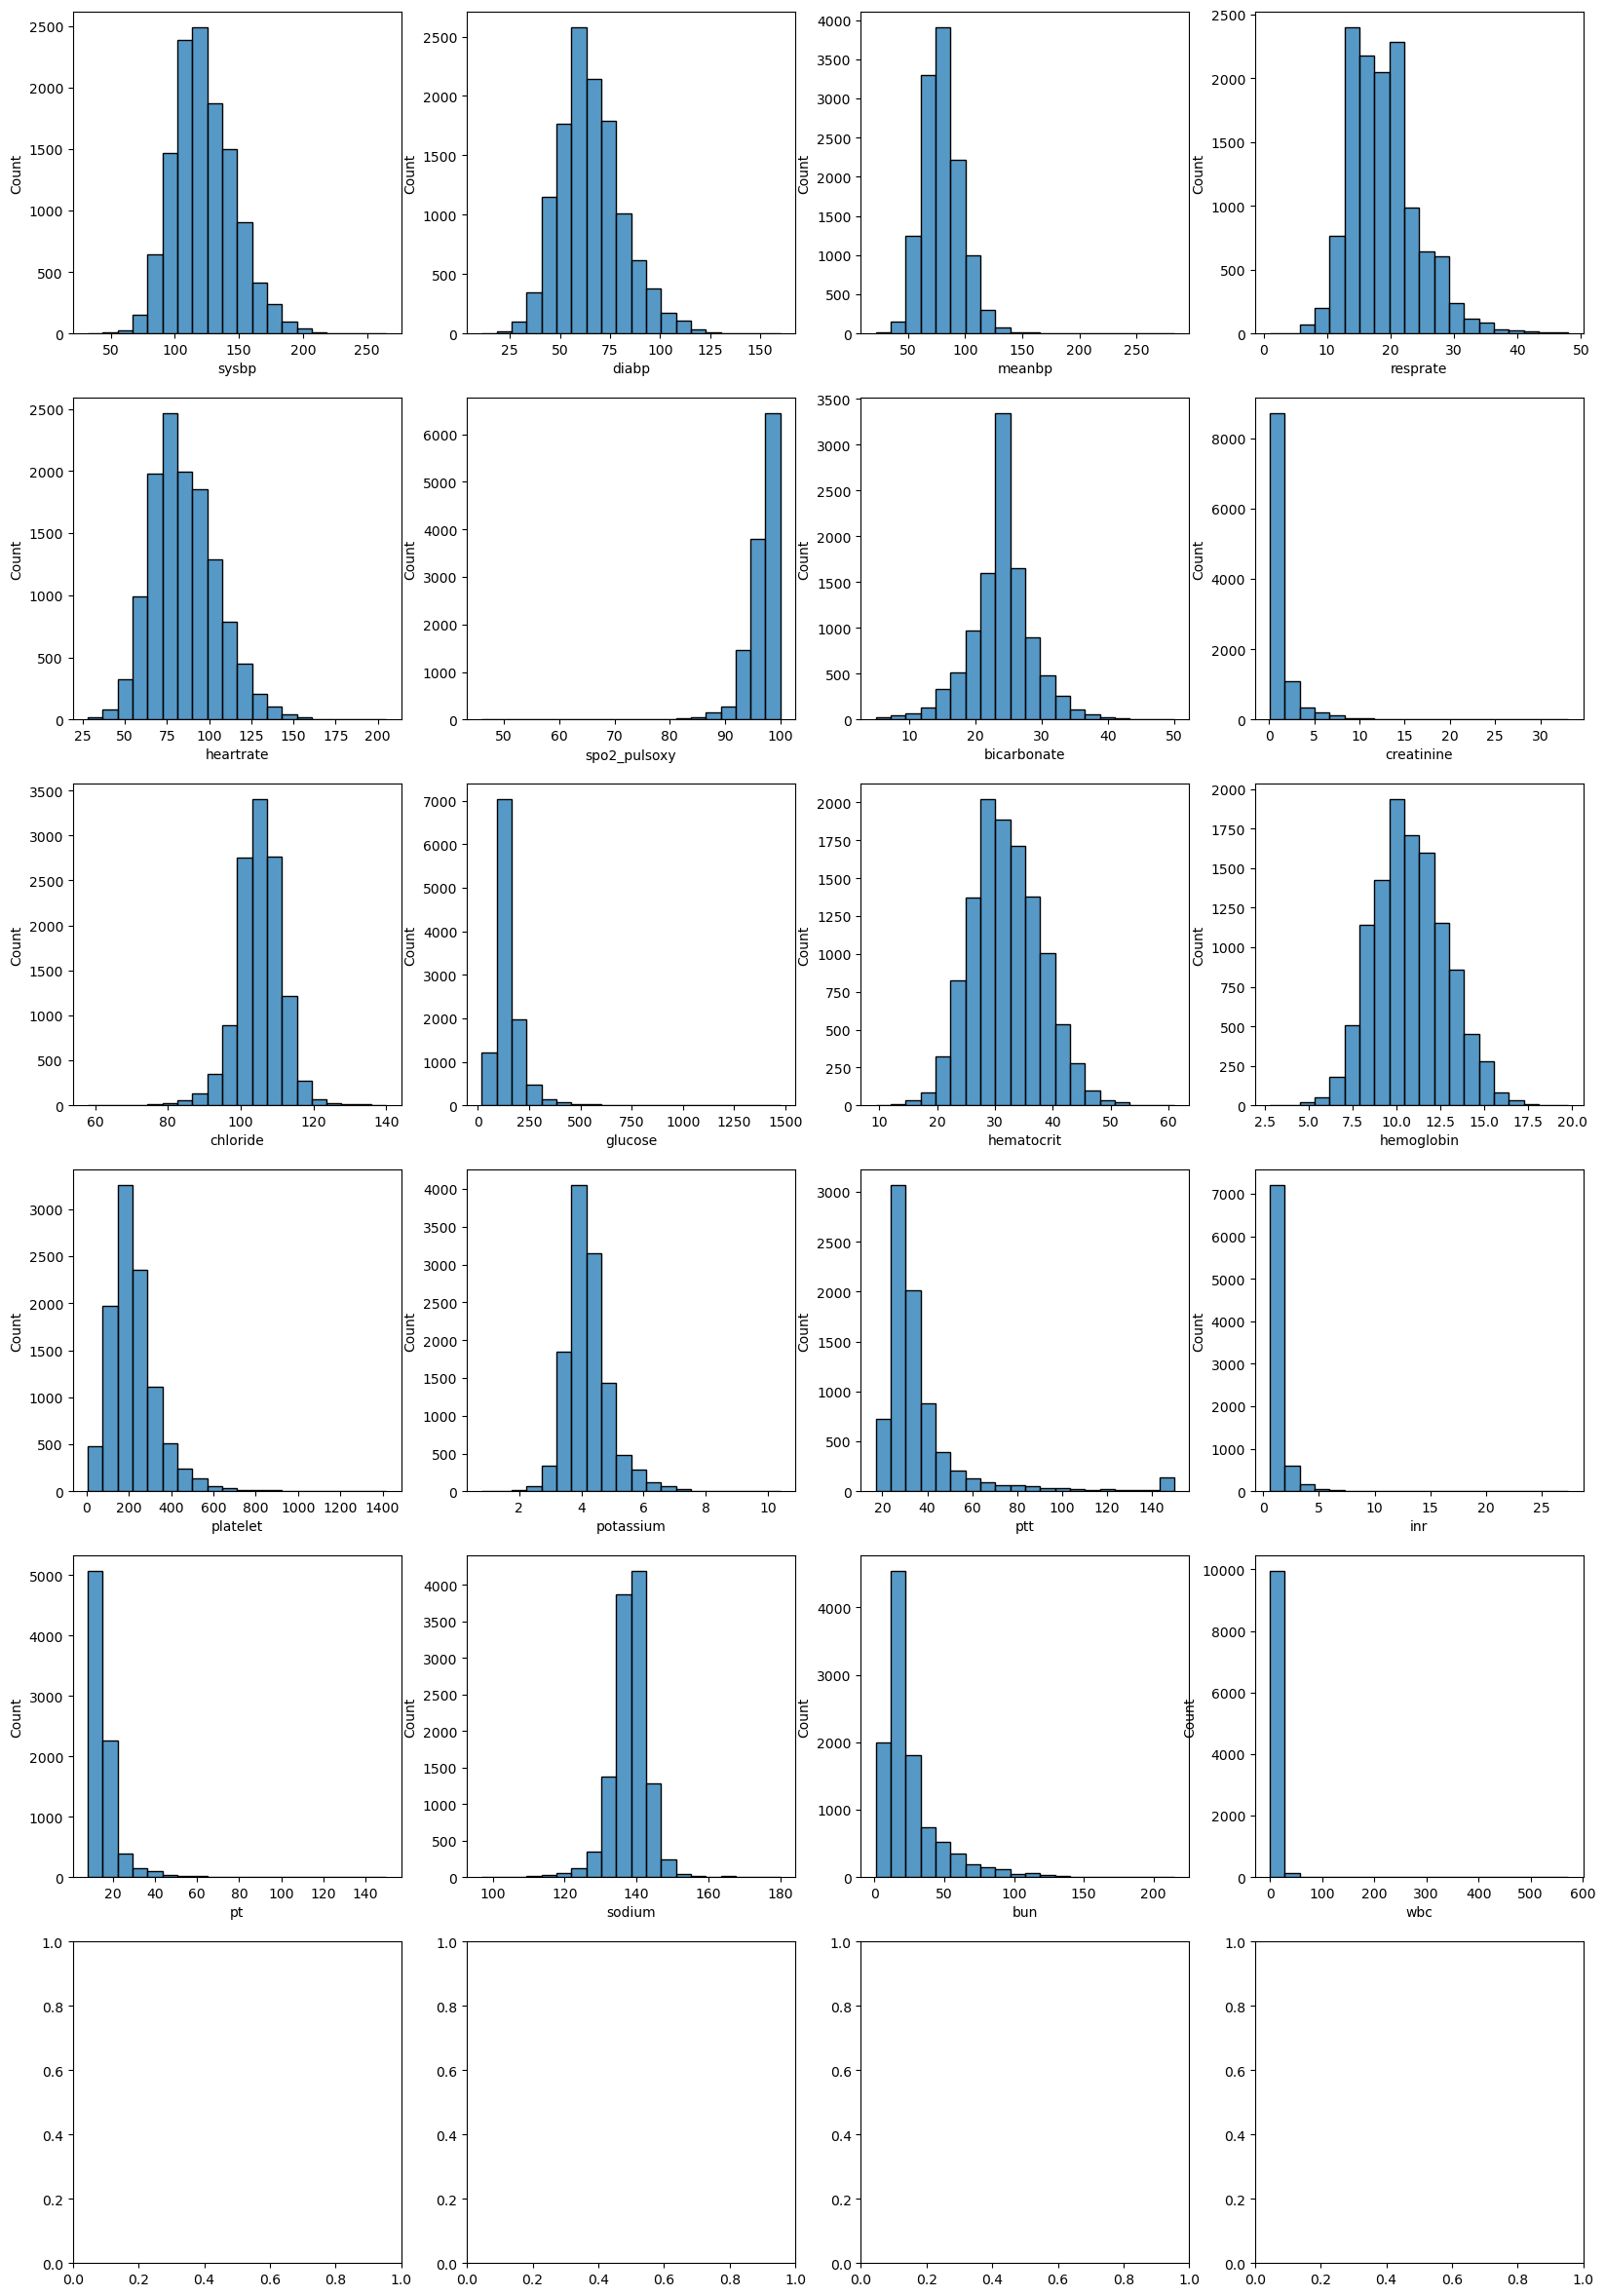

In [223]:
col_n = 4
row_n = int(len(display_df.columns) / 4 + 1)
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(display_df.columns[:-1]):
    sns.histplot(display_df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

In [224]:
# Use the statsmodels package
import statsmodels.api as sm

X = sm.add_constant(final_full_labvitals)
lin_model = sm.OLS(final_full_labvitals['sepsis_target'], X)
my_model = lin_model.fit()
print(my_model.summary())
print(my_model.params)

                            OLS Regression Results                            
Dep. Variable:          sepsis_target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.559e+28
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        00:08:19   Log-Likelihood:             7.4607e+05
No. Observations:               25272   AIC:                        -1.492e+06
Df Residuals:                   25249   BIC:                        -1.492e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.482e-14   9.33e-16    -48.023

In [230]:
data_X = final_full_labvitals.drop(columns=['sepsis_target'])
data_y = final_full_labvitals['sepsis_target']

In [234]:
model = LinearRegression()
predict = model.fit(data_X, data_y)
r2_score = predict.score(data_X, data_y)

In [241]:
print('R2 score is ', r2_score)
print('intercept (b0) ', model.intercept_)
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':data_X.columns, 
                    'coefficient Value': model.coef_}))

R2 score is  0.02281330732085718
intercept (b0)  0.0629029973337159
       Predictor coefficient Name  coefficient Value
0          sysbp            sysbp          -0.000350
1          diabp            diabp          -0.000462
2         meanbp           meanbp           0.000316
3       resprate         resprate           0.000394
4      heartrate        heartrate           0.000218
5   spo2_pulsoxy     spo2_pulsoxy          -0.000135
6    bicarbonate      bicarbonate           0.000056
7     creatinine       creatinine           0.000423
8       chloride         chloride          -0.000293
9        glucose          glucose          -0.000038
10    hematocrit       hematocrit          -0.000646
11    hemoglobin       hemoglobin           0.000690
12      platelet         platelet           0.000004
13     potassium        potassium          -0.004147
14           ptt              ptt           0.000050
15           inr              inr           0.005249
16            pt               